# Sentiment analysis of movie reviews


This assignment is graded by your `submission.json` which is created by a cell below. To generate your submission file you need to fill the values of **GRADING_ANSWER** instance fields.

You can press **"Submit Assignment"** at any time to submit partial progress.

In [66]:
from submit import Answer


GRADING_ANSWER = Answer()
GRADING_ANSWER.submit()

## Tasks

In [67]:
import pandas as pd
import numpy as np


data = pd.read_csv('sentiment.csv', index_col = 0)
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


**Task 1 (1 points)**
It seems that data contains some unnecessary HTML tags such as `<br />`, for example.

Find all types of HTML tags (the types of expressions in brackets of the form `<...>`). 


How many different tag types are their in the data? What is the most frequent tag? 

Write your answer as a string separating tag_count and most popular tag by space. 

**Example answer:** `"3 <p>"`

In [68]:
import re
from collections import Counter



In [69]:
data['tags'] = data.apply(lambda row: re.compile('<[^<>]+>').findall(row['review']), axis=1)

In [70]:
def count_uniq(df):
    result = {}

    for _, item in df.iteritems():
        for v in item:
            if v in result:
                result[v] += 1
            else:
                result[v] = 1

    return result

In [71]:
tags = list(count_uniq(data['tags']).keys())
tags

['<br />', '<SPOILER>', '</SPOILER>']

In [72]:
ANSWER = '3 <br />'

In [73]:
## GRADED PART, DO NOT CHANGE!
GRADING_ANSWER.Q1 = ANSWER

**Task 2 (1 points)**

Prepare your text. For this, replace tags from task 1 by spaces, remove multiple spaces (which may appear after tag removal), relace back slashes (`\`) with zero string,  and lower the text and strip it using `text.strip()`.

What is the mean number of unique characters in the review? 

Calculate number of unique characters in a string using `len(set(string))`.


In [74]:
def clean_row(review):
    
    # Step 1. Replace tags from task 1 by spaces
    r1 = review
    for tag in tags:
        r1 = r1.replace(tag, ' ')
        
    # Step 2. Remove multiple spaces
    r2 = re.sub(' +', ' ', r1)
    
    # Step 3. Relace back slashes (\) with zero string
    r3 = r2.replace('\\', ' ')
    
    # Step 4. Lower the text
    r4 = r3.lower()
    
    # Step 5. Remove spaces
    r5 = r4.strip()
    
    return r5

In [75]:
data['cleaned_reaview'] = data.apply(lambda row : clean_row(row['review']), axis = 1)

In [76]:
total = 0

for index, row in data.iterrows():
    chars = len(set(row['cleaned_reaview']))
    total += chars

avg = total / len(data.index)

In [77]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q2 = avg

**Task 3 (1 point)**

For sentiment analysis brackets may serve as a useful feature. Create feature counters for the number of positive smiles (opening brackets `)`) and for the negative smiles (opening brackets `(`) in the reviews. In the answer write a sum of their averages (`mean_positive + mean_negative`).

In [78]:
data['positive_count'] = data.apply(lambda row : row['review'].count(')'), axis = 1)
data['negative_count'] = data.apply(lambda row : row['review'].count('('), axis = 1)

In [79]:
mean_positive = data['positive_count'].sum(axis = 0) / len(data.index)
mean_negative = data['negative_count'].sum(axis = 0) / len(data.index)

In [80]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q3 = mean_positive + mean_negative

**Task 4 (1 point)**
Now remove all characters which are not English letters (`[a-zA-z]`) or digits (`[0-9]`) and tokenize the text splitting it by spaces. 

**Example:**
`'mother+father = parents'` -> `[mother, father, parents]`

Then remove stop words using nltk stopwords list for English (see cell below).

What is the mean number of unique tokens in a review?

In [81]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
def filter_special(text):
    # Step 1. Remove all characters which are not English letters ([a-zA-z]) or digits ([0-9])
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)

    # Step 2. Remove multiple spaces
    text = re.sub(' +', ' ', text)
    
    # Step 3. Remove spaces
    text = text.strip()
    
    return text

In [83]:
def filter_stopwords(tokens):
    return [w for w in tokens if not w.lower() in STOPWORDS]

In [84]:
def tokenize(text):
    text = filter_special(text)
    tokens = text.split()
    tokens = filter_stopwords(tokens)
    
    return tokens

In [85]:
data['tokenized'] = data.apply(lambda row : tokenize(row['cleaned_reaview']), axis = 1)
data['token_count'] = data.apply(lambda row : len(row['tokenized']), axis = 1)

In [86]:
mean_uniq_tokens = data['token_count'].sum(axis = 0) / len(data.index)

In [87]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q4 = mean_uniq_tokens

**Task 5 (1 point)**

❗️Please, note, that this task may have a longer runtime.

Using the same preprocessing as in task 4, tokenize the text into 3-grams. 

What is the most common 3-gram?

**Example answer:** `"the cat sat"`.

**Hint:** You may use `data['tokenized']` column and function `ngrams` from `nltk.util`.

In [88]:
import operator
from nltk.util import ngrams



In [89]:
data['3gram'] = data.apply(lambda row: [' '.join(list(v)) for v in list(ngrams(row['tokenized'], 3))], axis=1)

In [90]:
x = count_uniq(data['3gram'])
most_common = max(x.items(), key=operator.itemgetter(1))[0]

In [91]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q5 = most_common

**Task 6 (1 point)**

❗️Please, note, that this task may have a longer runtime.

Use `WordPunctTokenizer` from `nltk` library for text tokenization. Apply it to `data['cleaned_review']`, then remove punctuation using `string.punctuation` and stopwords as before.

What is top-10 most frequent tokens? (Write tokens in one string separated by spaces).

**Example answer:** `'mother film cinema two good film even would really story'`

In [92]:
import string
from nltk import WordPunctTokenizer


tk = WordPunctTokenizer()

In [93]:
data['nltk_tokenized'] = data.apply(lambda row: tk.tokenize(row['cleaned_reaview']), axis=1)

In [94]:
def filter_tokenized(words):
    return [w for w in words if (w not in STOPWORDS and \
                                w not in string.punctuation)]

In [95]:
data['nltk_tokenized'] = data.apply(lambda row: filter_tokenized(row['nltk_tokenized']), axis=1)

In [96]:
x = count_uniq(data['nltk_tokenized'])
fr_tokens_sorted = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

result = ' '.join(list(fr_tokens_sorted)[:10])

In [97]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q6 = result

**Task 7 (1 point)** 

❗️Please, note, that this task may have a longer runtime.

Using `SnowballStemmer ` from `nltk.stem.snowball` stem first 100 lines in the data (`data.head(100)['nltk_tokenized']`). 

What is the number of unique stems?

In [98]:
from nltk.stem.snowball import SnowballStemmer 


stemmer = SnowballStemmer("english")

In [99]:
def filter_stemm(tokens):
    stems = []
    
    for token in tokens:
        token = stemmer.stem(token)
        if token != '':
            stems.append(token)
    
    return stems

In [100]:
data['nltk_stemmed'] = data.apply(lambda row: filter_stemm(row['nltk_tokenized']), axis=1)

In [101]:
x = count_uniq(data['nltk_stemmed'][:100])

In [102]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q7 = len(x.keys())

**Task 8 (1 point)** Using `nltk.stem.WordNetLemmatizer()` lemmatize first 100 lines in the data (`data.head(100)['nltk_tokenized']`). 

What is the number of unique lemmas?

In [103]:
import nltk
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [104]:
data['nltk_lemmatized'] = data.apply(lambda row: [lemmatizer.lemmatize(w) for w in row['nltk_tokenized']], axis=1)

In [105]:
x = count_uniq(data['nltk_lemmatized'][:100])

In [106]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q8 = len(x.keys())

### Classification model

Now it's time to solve a text classification task. First, split the data using the cell below (do not change the random state!).

In [107]:
from sklearn.model_selection import train_test_split



Compute features for `train_df` and `test_df`.
* length of the original review
* length of the text in tokens (use `nltk_tokenized` column)
* length of the text in 3-grams (use `3gram` column)
* number of unigue tokens (use `nltk_tokenized` column)
* number of unique 3-grams (use `3gram` column)
* positive_count and negative_count from task 3
* counters for tokens best, worst, good, bad, excellent, horrible (use `nltk_tokenized` column and create a separate feature for each of this tokens).

Thus, you obtain the following list of features: 

`features = ['original_length','token_length', '3gram_length', 'token_count', '3gram_count', 'best_count', 'worst_count', 'good_count', 'bad_count', 'excellent_count', 'horrible_count', 'positive_count', 'negative_count']`


**Task 9 (1 point)** 

Compute **absolute** correlation between features and target variable `sentiment` in `train_df`. What is the most correlated variable?

**Hint:** use `np.corrcoef` and do not forget about `abs`.

In [108]:
from scipy.stats.stats import pearsonr


features = ['original_length','token_length', '3gram_length', 'token_count', '3gram_count', 'best_count', 'worst_count', 'good_count', 'bad_count', 'excellent_count', 'horrible_count', 'positive_count', 'negative_count']

In [109]:
data['original_length'] = data.apply(lambda row: len(row['review']), axis=1)
data['token_length'] = data.apply(lambda row: len(row['nltk_tokenized']), axis=1)
data['3gram_length'] = data.apply(lambda row: len(row['3gram']), axis=1)
data['token_count'] = data.apply(lambda row: len(set(row['nltk_tokenized'])), axis=1)
data['3gram_count'] = data.apply(lambda row: len(set(row['3gram'])), axis=1)

In [110]:
data['best_count']  = data.apply(lambda row: len([w for w in row['nltk_tokenized'] if w == 'best']), axis=1)
data['worst_count']  = data.apply(lambda row: len([w for w in row['nltk_tokenized'] if w == 'worst']), axis=1)
data['good_count']  = data.apply(lambda row: len([w for w in row['nltk_tokenized'] if w == 'good']), axis=1)
data['bad_count']  = data.apply(lambda row: len([w for w in row['nltk_tokenized'] if w == 'bad']), axis=1)
data['excellent_count']  = data.apply(lambda row: len([w for w in row['nltk_tokenized'] if w == 'excellent']), axis=1)
data['horrible_count']  = data.apply(lambda row: len([w for w in row['nltk_tokenized'] if w == 'horrible']), axis=1)

In [111]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 42)
train_df = train_df.copy()
test_df = test_df.copy()

train_df.head()

,sentiment,review,tags,cleaned_reaview,positive_count,negative_count,tokenized,token_count,3gram,nltk_tokenized,...,original_length,token_length,3gram_length,3gram_count,best_count,worst_count,good_count,bad_count,excellent_count,horrible_count
9254,0,"Actress Patty Duke wrote an insightful, funny,...",[],"actress patty duke wrote an insightful, funny,...",3,3,"[actress, patty, duke, wrote, insightful, funn...",97,"[actress patty duke, patty duke wrote, duke wr...","[actress, patty, duke, wrote, insightful, funn...",...,1083,107,102,102,0,0,1,0,0,0
1561,1,In answer to the person who made the comment a...,"[<br />, <br />]",in answer to the person who made the comment a...,0,0,"[answer, person, made, comment, film, drags, b...",57,"[answer person made, person made comment, made...","[answer, person, made, comment, film, drags, b...",...,825,75,73,72,0,0,0,0,0,0
1670,0,Madison is not too bad-if you like simplistic...,"[<br />, <br />, <br />, <br />, <br />, <br /...",madison is not too bad-if you like simplistic...,2,2,"[madison, bad, like, simplistic, non, offensiv...",188,"[madison bad like, bad like simplistic, like s...","[madison, bad, -, like, simplistic, non, offe...",...,2224,213,208,208,1,0,0,1,0,0
6087,0,This is a strange sex comedy because there`s v...,"[<br />, <br />]",this is a strange sex comedy because there`s v...,0,0,"[strange, sex, comedy, little, comedy, whole, ...",60,"[strange sex comedy, sex comedy little, comedy...","[strange, sex, comedy, little, comedy, whole, ...",...,694,66,64,64,0,0,0,0,0,0
6669,1,Thats My Bush is first of all a very entertain...,"[<br />, <br />, <br />, <br />, <br />, <br /...",thats my bush is first of all a very entertain...,0,0,"[thats, bush, first, entertaining, show, parke...",179,"[thats bush first, bush first entertaining, fi...","[thats, bush, first, entertaining, show, parke...",...,2980,254,251,251,0,1,1,0,0,0


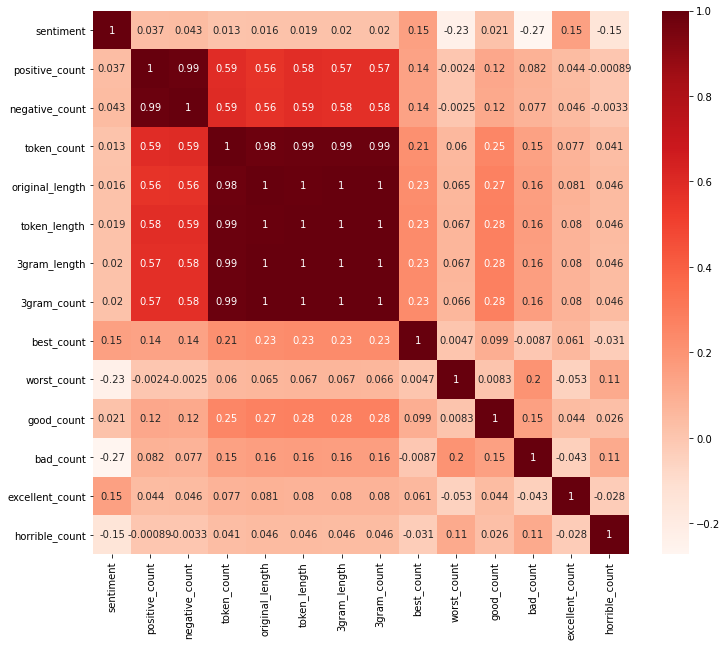

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns


#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = train_df.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [113]:
for feature in features:
    corr = abs(np.corrcoef(train_df['sentiment'], train_df[feature])[1, 0])
    print(f'corr sentiment with {feature}: {corr}')

corr sentiment with original_length: 0.01631844812397975
corr sentiment with token_length: 0.018608658237475487
corr sentiment with 3gram_length: 0.020021172482531102
corr sentiment with token_count: 0.01336065176447065
corr sentiment with 3gram_count: 0.020062888429880195
corr sentiment with best_count: 0.15141741713861787
corr sentiment with worst_count: 0.23431738493554014
corr sentiment with good_count: 0.020682821389952873
corr sentiment with bad_count: 0.2721499998381999
corr sentiment with excellent_count: 0.15473460802284225
corr sentiment with horrible_count: 0.14664118806788645
corr sentiment with positive_count: 0.037240831175317936
corr sentiment with negative_count: 0.04300851753180155


In [114]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q9 = 'bad_count'

**Task 10 (1 point)**

Scale the data using `StandardScaler` from `sklearn` and train `LogisticRegression` with default parametes from `sklearn.linear_model`.

What is F1-score for the `test_df`? Round your answer up to 4 points after the decimal point (`round(score, 4)`).

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score



In [116]:
X_train = train_df.loc[:, features].values
y_train = train_df.loc[:,['sentiment']].values

X_test = test_df.loc[:, features].values
y_test = test_df.loc[:,['sentiment']].values

In [117]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [118]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

In [119]:
score = f1_score(y_test, y_pred)
round(score, 4)

0.7162

In [120]:
## GRADED PART, PUT YOUR ANSWER HERE
GRADING_ANSWER.Q10 = round(score, 4)

❗️Remember to **run the first code cell again** before submitting the solution.